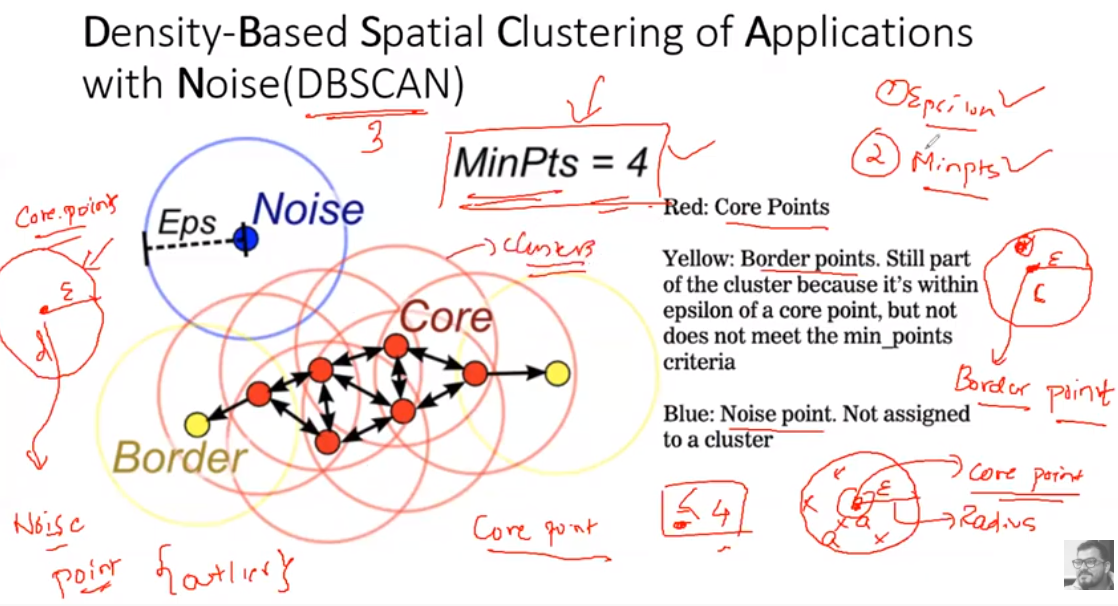

So DBSCAN is an Unsupervised learning technique which works really well with Noise.

So we start with 2 things

    1. Epsison : Is radius using which we draw a circle using a point as centre.
    2. Min Points : Condition which decides a point will be considered a Core point or Border point 

So for example we take **MinPOints = 4** and using an Epison value we draw circles around all the points. 

A points which as minimun 4 points inside the circle then thats consider **Core POint** in this Red points.

A point which doesnt satisfy the minimun points criterea but has atleast 1 core point. then its a **Border point** in this case yellow.

A point which no other points which its circle is considered **Noise**

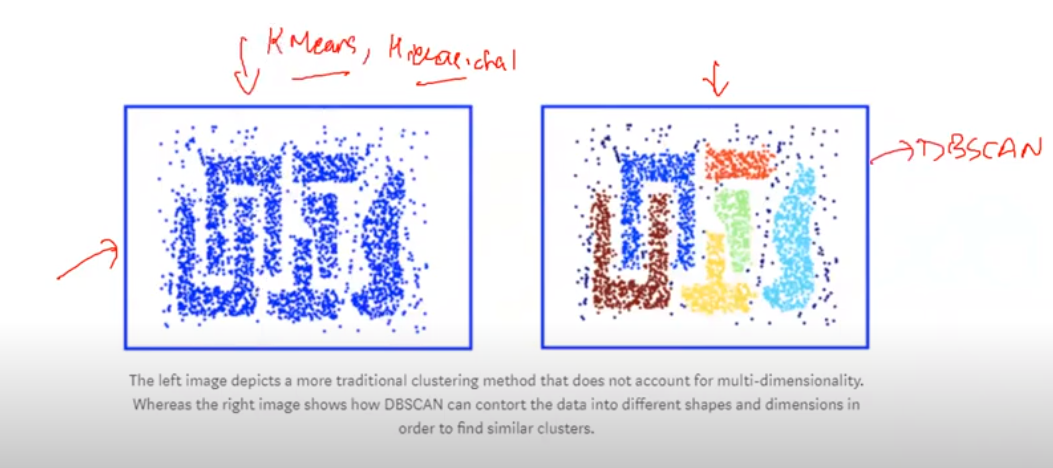

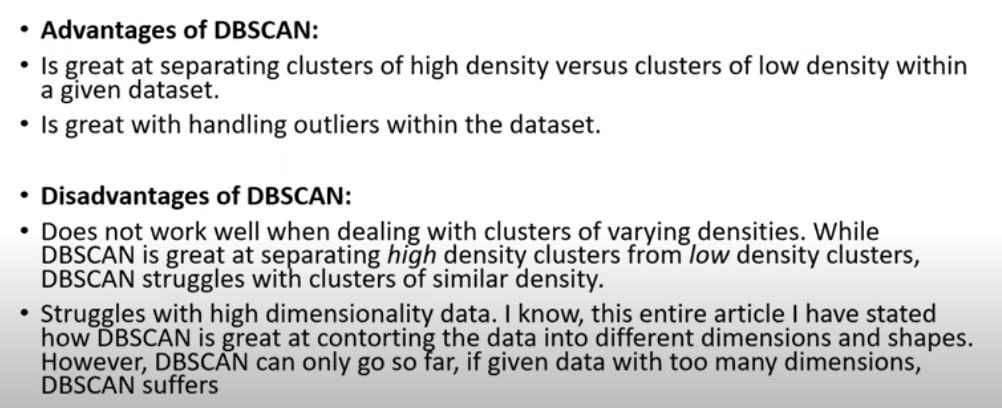

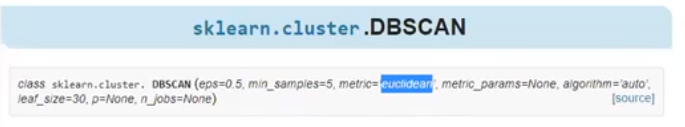

So we have parameters like Epsilon, Min_samples and metric where we can use Euclidean or Manhatan distance. 

**Problem Statement :** Cluster the dataset based on Annual income and Spending score

In [1]:
# DBSCAN Clustering

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./Exercise_Data/v72_Mall_Customers.csv')

print(dataset.head())

X = dataset.iloc[:, [3, 4]].values # we take only 3 and 4 column

# as this a unsupervised learning we dont have labels (Dependent feature) only independent feature

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_
set(labels) # so we values from -1 to 8

#Note : -1 value means outliers or Noise so we dont consider it excluding that we have 9 clusters

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [3]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool) # set value as zero and turn the datatype to bool makes it false

print(labels)

print(sample_cores)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  3
  3 -1  3 -1 -1  4 -1 -1 -1  4  5  4 -1  4  5 -1  5  4 -1  4  5 -1 -1  6
 -1 -1 -1  7 -1  6 -1  6 -1  7 -1  6 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  8 -1  8 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False 

In [8]:
sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(X,labels))

-0.1908319132560097
